In [95]:
import nltk
import re
import string
import warnings
import numpy as np 
import pandas as pd 
import seaborn as sns
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from nltk.stem import WordNetLemmatizer  
%matplotlib inline

# Machin Learning
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize

# Calculate accuracy of the classification model 
from sklearn.metrics import accuracy_score, f1_score
 
# Using two algorithem for comparing the dataset
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [5]:
# nlp packages
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pooja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import pandas as pd
traindata = pd.read_csv('dataset.csv')
traindata.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
# Missing values check
missing_train = traindata.isnull().sum()
print(f'Missing values:\n{missing_train}')
print('-' * 40)
# getting more information about datafram
traindata.info()
# getting more description about datafram
traindata.describe()

Missing values:
Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [278]:
traindata["labels"] = traindata["class"].map({0: "Hate Speech",
                                    1: "Offensive Language",
                                    2: "No Hate and Offensive"})
print(traindata.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                                                                                                                          tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...   
1                                                         !!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!   
2                      !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? 

In [279]:
print(traindata["tweet"].iloc[0],"\n")
print(traindata["tweet"].iloc[3],"\n")
print(traindata["tweet"].iloc[7],"\n")
print(traindata["tweet"].iloc[77],"\n")
print(traindata["tweet"].iloc[89],"\n")
print(traindata["tweet"].iloc[78],"\n")
print(traindata["tweet"].iloc[20],"\n")

!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out... 

!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!! 

!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit 

!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny 

!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361; 

!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out... 

!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out... 



In [280]:
# label my Dataset
traindata = traindata[["tweet", "labels"]]
traindata.head()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,No Hate and Offensive
1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,Offensive Language


In [293]:
# Cleaning of dataset
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub(r"\@w+|\#",'',text)
    text = re.sub(r"[^\w\s]",'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    tweet_tokens = word_tokenize(text)
    filtered_tweets=[w for w in tweet_tokens if not w in stopword] #removing stopwords
    return " ".join(filtered_tweets)

In [295]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stopword = set(stopwords.words('english'))
traindata.tweet = traindata['tweet'].apply(clean)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pooja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pooja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [297]:
tweetdata = traindata.drop_duplicates("tweet")
tweetdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24506 entries, 0 to 24782
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          24506 non-null  int64  
 1   count               24506 non-null  int64  
 2   hate_speech         24506 non-null  int64  
 3   offensive_language  24506 non-null  int64  
 4   neither             24506 non-null  int64  
 5   class               24506 non-null  int64  
 6   tweet               24506 non-null  object 
 7   word_count          24506 non-null  int64  
 8   char_count          24506 non-null  int64  
 9   avg_word_length     24506 non-null  float64
 10  hashtags_count      24506 non-null  int64  
 11  mentions_count      24506 non-null  int64  
 12  exclamation_count   24506 non-null  int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 2.6+ MB


In [285]:
lemmatizer=WordNetLemmatizer()
def lemmatizing(traindata):
    tweet=[lemmatizer.lemmatize(word) for word in traindata]
    return traindata
import nltk
nltk.download('wordnet')
tweetdata['tweet']=tweetdata['tweet'].apply(lambda x: lemmatizing(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pooja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [349]:
# printing the dataset after cleaning my dataset
print(tweetdata["tweet"].iloc[10],"\n")
print(tweetdata["tweet"].iloc[18],"\n")
print(tweetdata["tweet"].iloc[27],"\n")
print(tweetdata["tweet"].iloc[77],"\n")
print(tweetdata["tweet"].iloc[304],"\n")

keeks bitch curves everyone lol walked conversation like smh 

bitches get cut everyday b 

met pussy ocean dr gave pussy pill 

beeasyjrizzy u ever kill ant sidewalk think damn nigga way get pussyno bs must b 

sniff perved scally lad fuck yeah 



In [328]:
# Checking in my dataset how many columns are there in my dataset 
print(tweetdata.columns)
tweetdata['count'].value_counts()

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet', 'word_count', 'char_count', 'avg_word_length',
       'hashtags_count', 'mentions_count', 'exclamation_count'],
      dtype='object')


count
3    22558
6     1546
4      210
9      166
7       26
Name: count, dtype: int64

In [355]:
# Apply N-gram on Dataset
vect=TfidfVectorizer(ngram_range=(1,2)).fit(traindata['tweet'])
Ngram_names=vect.get_feature_names_out()
print("number of 2-gram: {}\n", format(len(Ngram_names)))
print("First 1000 features: \n", format(Ngram_names[:50]))

number of 2-gram: {}
 208234
First 1000 features: 
 ['00' '00 bet' '00 burg' '00 lives' '00 pm' '000' '000 000' '000 128514'
 '000 8230' '000 birds' '000 bitches' '000 deaths' '000 dinner'
 '000 dollars' '000 elixer' '000 florida' '000 followers' '000 from'
 '000 neworleans' '000 person' '000 ppl' '000 the' '000 tweets' '000 ways'
 '000 worth' '0000000000000' '0000000000000 fuckbyrd' '003' '003 http'
 '007' '007 http' '007beardownjedi' '007beardownjedi the' '007hertzrumble'
 '007hertzrumble http' '007m_h' '007m_h lilduval' '00_jackie'
 '00_jackie darknight420' '00_jackie no' '00am' '00am not' '00pm'
 '00pm proof' '00sexilexi00' '00sexilexi00 freeze' '00sexilexi00 http'
 '00sexilexi00 nigga' '00sexilexi00 socass_' '00sexilexi00 swiggety']


In [356]:
# apply 3-gram in my clean dataset 
vect=TfidfVectorizer(ngram_range=(1,3)).fit(traindata['tweet'])
Ngram_names=vect.get_feature_names_out()
print("number of 3-gram: {}\n", format(len(Ngram_names)))
print("First 1000 features: \n", format(Ngram_names[:50]))

number of 3-gram: {}
 465959
First 1000 features: 
 ['00' '00 bet' '00 bet its' '00 burg' '00 burg mall' '00 lives'
 '00 lives with' '00 pm' '00 pm eastern' '00 pm to' '00 pm today' '000'
 '000 000' '000 000 8230' '000 128514' '000 128514 128514' '000 8230'
 '000 birds' '000 birds year' '000 bitches' '000 bitches amp' '000 deaths'
 '000 deaths 128534' '000 dinner' '000 dinner dates' '000 dollars'
 '000 dollars at' '000 elixer' '000 elixer that' '000 florida'
 '000 florida jobs' '000 followers' '000 followers 22'
 '000 followers breh' '000 followers she' '000 followers you' '000 from'
 '000 from it' '000 neworleans' '000 neworleans 0000000000000'
 '000 person' '000 person poll' '000 ppl' '000 ppl amp' '000 the'
 '000 the fade' '000 tweets' '000 tweets still' '000 tweets with'
 '000 ways']


In [338]:
# splitting of dataset
X = traindata['tweet']
Y = traindata['count']
X = vect.transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("X_train", (X_train.shape))
print("Y_train", (Y_train.shape))
print("X_test", (X_test.shape))
print("Y_test", (Y_test.shape))

X_train (19826, 208234)
Y_train (19826,)
X_test (4957, 208234)
Y_test (4957,)


In [354]:
# apply logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
logreg_predict = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_predict, Y_test)
print("logistic accuracy: {:.2f}%".format(logreg_acc*100))

logistic accuracy: 92.58%


In [334]:
# extracting Features of every tweet
import pandas as pd
traindata['word_count'] = traindata['tweet'].apply(lambda x: len(x.split()))
traindata['char_count'] = traindata['tweet'].apply(len)
traindata['avg_word_length'] = traindata['char_count'] / traindata['word_count']
traindata['hashtags_count'] = traindata['tweet'].apply(lambda x: x.count('#'))
traindata['mentions_count'] = traindata['tweet'].apply(lambda x: x.count('@'))
traindata['exclamation_count'] = traindata['tweet'].apply(lambda x: x.count('!'))
print(traindata[['word_count', 'char_count', 'avg_word_length', 'hashtags_count', 'mentions_count', 'exclamation_count']])
print(traindata)
traindata.head()

       word_count  char_count  avg_word_length  hashtags_count  \
0              25         140         5.600000               0   
1              16          85         5.312500               0   
2              21         120         5.714286               0   
3               9          62         6.888889               0   
4              26         137         5.269231               1   
...           ...         ...              ...             ...   
24778          19         146         7.684211               3   
24779          13          70         5.384615               0   
24780          13          67         5.153846               0   
24781           7          37         5.285714               0   
24782          18         127         7.055556               0   

       mentions_count  exclamation_count  
0                   1                  3  
1                   1                  7  
2                   2                 11  
3                   2              

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,word_count,char_count,avg_word_length,hashtags_count,mentions_count,exclamation_count
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,25,140,5.600000,0,1,3
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,16,85,5.312500,0,1,7
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,21,120,5.714286,0,2,11
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,9,62,6.888889,0,2,9
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,26,137,5.269231,1,1,13


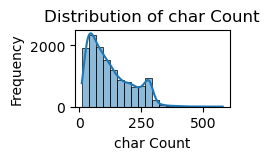

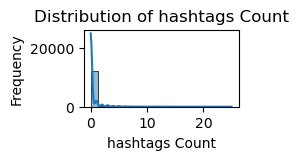

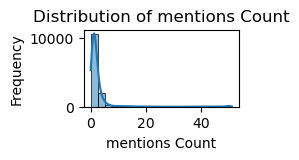

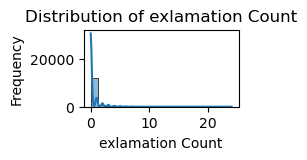

In [340]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of char count
plt.figure(figsize=(2, 1))
sns.histplot(train1_df['char_count'], bins=20, kde=True)
plt.xlabel('char Count')
plt.ylabel('Frequency')
plt.title('Distribution of char Count')
plt.show()
# Distribution of hashtags count
plt.figure(figsize=(2, 1))
sns.histplot(train1_df['hashtags_count'], bins=20, kde=True)
plt.xlabel('hashtags Count')
plt.ylabel('Frequency')
plt.title('Distribution of hashtags Count')
plt.show()
# Distribution of mentions count
plt.figure(figsize=(2, 1))
sns.histplot(train1_df['mentions_count'], bins=20, kde=True)
plt.xlabel('mentions Count')
plt.ylabel('Frequency')
plt.title('Distribution of mentions Count')
plt.show()
# Distribution of exclamation count
plt.figure(figsize=(2, 1))
sns.histplot(train1_df['exclamation_count'], bins=20, kde=True)
plt.xlabel('exlamation Count')
plt.ylabel('Frequency')
plt.title('Distribution of exlamation Count')
plt.show()

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')


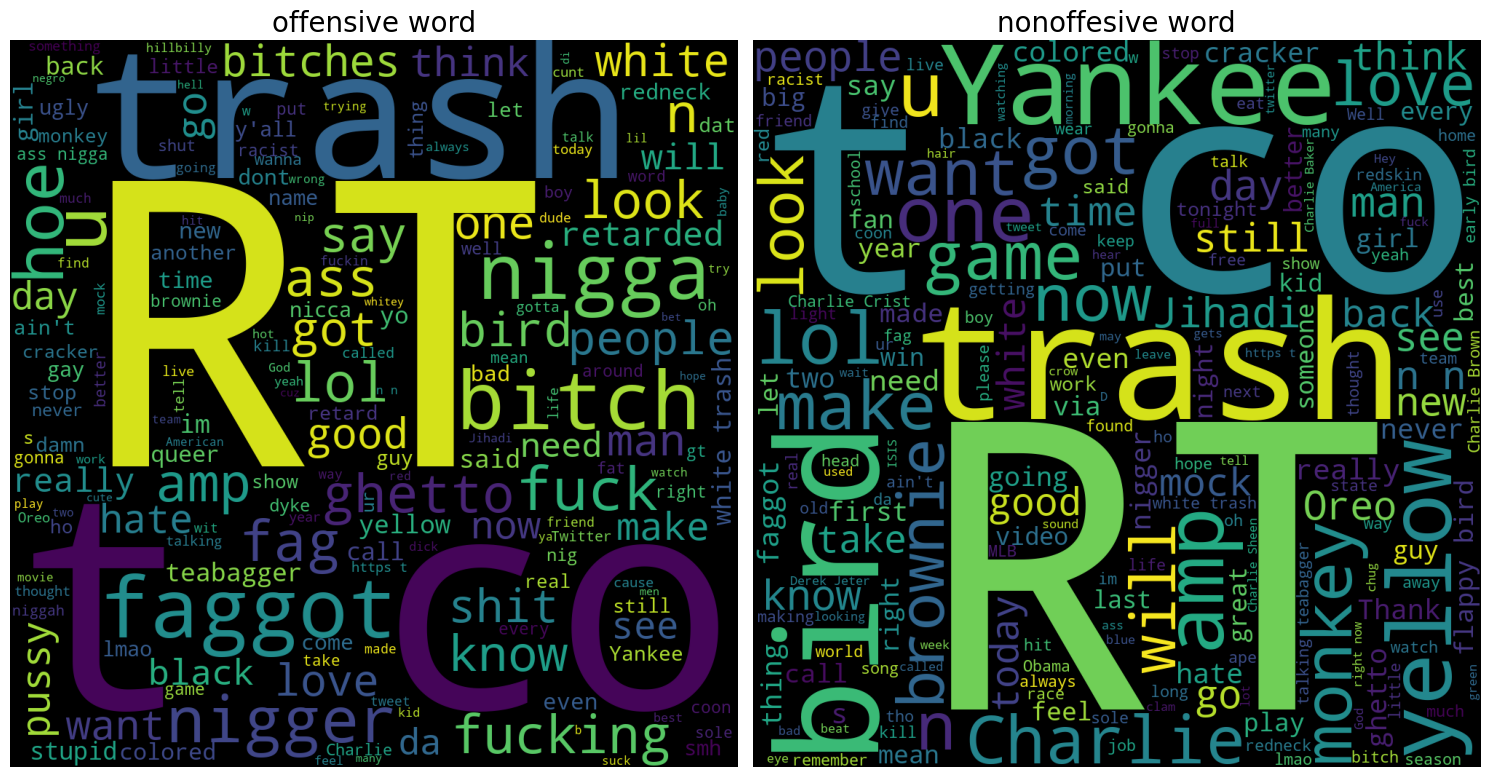

In [357]:
# Plotting wordclouds for offensive language in Training Dataset
import pandas as pd
import re
train_df = pd.read_csv('dataset.csv')
print(train_df.columns)
offense_lang_tweets = train_df['tweet'][train_df['offensive_language']==1].to_string()
wordcloud_offense_lang = WordCloud(width = 1000, height = 1000, 
                               background_color ='black', stopwords = stopwords,
                               min_font_size = 15).generate(offense_lang_tweets)
nonoffense_lang_tweets = train_df['tweet'][train_df['offensive_language']==0].to_string()
wordcloud_nonoffense_lang = WordCloud(width = 1000, height = 1000, 
                               background_color ='black', stopwords = stopwords,
                               min_font_size = 15).generate(nonoffense_lang_tweets)
# Plotting the WordCloud images                     
plt.figure(figsize=(15, 8), facecolor = None)

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_offense_lang)
plt.axis("off")
plt.title('offensive word', fontdict={'fontsize': 20})

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_nonoffense_lang)
plt.axis("off")
plt.title('nonoffesive word', fontdict={'fontsize': 20})

plt.tight_layout() 
plt.show()